## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import tensorflow.keras as keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 0.03
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95, 0.9, 0.85, 0.8]
NESTEROV = [ True, False]            

In [7]:
results = {}

for mo in MOMENTUM:
    for ne in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.2f" % (mo), (ne))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=ne, momentum=mo)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "exp-mo-%s" % str(mo)+str(ne)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.95 True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 3s 59us/sample - loss: 0.6446 - accuracy: 0.7668 - val_loss: 2.1374 - val_accuracy: 0.4855
Epoch 49/50
50000/50000 [==============================] - 3s 59us/sample - loss: 0.6346 - accuracy: 0.7701 - val_loss: 2.1372 - val_accuracy: 0.4909
Epoch 50/50
50000/50000 [==============================] - 3s 61us/sample - loss: 0.6041 - accuracy: 0.7810 - val_loss: 2.1935 - val_accuracy: 0.4964
Experiment with MOMENTUM = 0.95 False
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_______________________________________________

50000/50000 [==============================] - 3s 64us/sample - loss: 0.9925 - accuracy: 0.6385 - val_loss: 1.6464 - val_accuracy: 0.4908
Epoch 46/50
50000/50000 [==============================] - 3s 65us/sample - loss: 0.9973 - accuracy: 0.6365 - val_loss: 1.6360 - val_accuracy: 0.4948
Epoch 47/50
50000/50000 [==============================] - 3s 61us/sample - loss: 0.9844 - accuracy: 0.6440 - val_loss: 1.6573 - val_accuracy: 0.4890
Epoch 48/50
50000/50000 [==============================] - 3s 60us/sample - loss: 0.9591 - accuracy: 0.6524 - val_loss: 1.6642 - val_accuracy: 0.4829
Epoch 49/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.9858 - accuracy: 0.6427 - val_loss: 1.6194 - val_accuracy: 0.5027
Epoch 50/50
50000/50000 [==============================] - 3s 63us/sample - loss: 0.9547 - accuracy: 0.6534 - val_loss: 1.7263 - val_accuracy: 0.4894
Experiment with MOMENTUM = 0.90 True
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 3s 62us/sample - loss: 0.5560 - accuracy: 0.7990 - val_loss: 1.9429 - val_accuracy: 0.5180
Epoch 43/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.5469 - accuracy: 0.8027 - val_loss: 2.0492 - val_accuracy: 0.4902
Epoch 44/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.5312 - accuracy: 0.8091 - val_loss: 2.0177 - val_accuracy: 0.5181
Epoch 45/50
50000/50000 [==============================] - 3s 61us/sample - loss: 0.4987 - accuracy: 0.8205 - val_loss: 2.1570 - val_accuracy: 0.5085
Epoch 46/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.5061 - accuracy: 0.8169 - val_loss: 2.0345 - val_accuracy: 0.5174
Epoch 47/50
50000/50000 [==============================] - 3s 67us/sample - loss: 0.4829 - accuracy: 0.8245 - val_loss: 2.2726 - val_accuracy: 0.5059
Epoch 48/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.4679 - accuracy: 0.8333 - va

50000/50000 [==============================] - 3s 62us/sample - loss: 0.7949 - accuracy: 0.7108 - val_loss: 1.6688 - val_accuracy: 0.5145
Epoch 40/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7710 - accuracy: 0.7219 - val_loss: 1.5957 - val_accuracy: 0.5204
Epoch 41/50
50000/50000 [==============================] - 3s 60us/sample - loss: 0.7444 - accuracy: 0.7298 - val_loss: 1.6620 - val_accuracy: 0.5161
Epoch 42/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7274 - accuracy: 0.7360 - val_loss: 1.6746 - val_accuracy: 0.5182
Epoch 43/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7161 - accuracy: 0.7399 - val_loss: 1.7167 - val_accuracy: 0.5134
Epoch 44/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.7046 - accuracy: 0.7437 - val_loss: 1.7264 - val_accuracy: 0.5273
Epoch 45/50
50000/50000 [==============================] - 3s 62us/sample - loss: 0.6756 - accuracy: 0.7538 - va

50000/50000 [==============================] - 3s 69us/sample - loss: 0.6550 - accuracy: 0.7649 - val_loss: 1.7406 - val_accuracy: 0.5118
Epoch 37/50
50000/50000 [==============================] - 3s 69us/sample - loss: 0.6418 - accuracy: 0.7695 - val_loss: 1.7006 - val_accuracy: 0.5088
Epoch 38/50
50000/50000 [==============================] - 3s 67us/sample - loss: 0.6065 - accuracy: 0.7840 - val_loss: 1.7389 - val_accuracy: 0.5064
Epoch 39/50
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5955 - accuracy: 0.7859 - val_loss: 1.7384 - val_accuracy: 0.5216
Epoch 40/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.5780 - accuracy: 0.7936 - val_loss: 2.0926 - val_accuracy: 0.4809
Epoch 41/50
50000/50000 [==============================] - 3s 70us/sample - loss: 0.5712 - accuracy: 0.7948 - val_loss: 1.8927 - val_accuracy: 0.5129
Epoch 42/50
50000/50000 [==============================] - 3s 66us/sample - loss: 0.5334 - accuracy: 0.8087 - va

50000/50000 [==============================] - 3s 67us/sample - loss: 0.8150 - accuracy: 0.7076 - val_loss: 1.4954 - val_accuracy: 0.5373
Epoch 34/50
50000/50000 [==============================] - 4s 70us/sample - loss: 0.8076 - accuracy: 0.7079 - val_loss: 1.6113 - val_accuracy: 0.5166
Epoch 35/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.7934 - accuracy: 0.7147 - val_loss: 1.5083 - val_accuracy: 0.5276
Epoch 36/50
50000/50000 [==============================] - 3s 69us/sample - loss: 0.7738 - accuracy: 0.7203 - val_loss: 1.5853 - val_accuracy: 0.5215
Epoch 37/50
50000/50000 [==============================] - 4s 73us/sample - loss: 0.7535 - accuracy: 0.7274 - val_loss: 1.5749 - val_accuracy: 0.5142
Epoch 38/50
50000/50000 [==============================] - 4s 72us/sample - loss: 0.7287 - accuracy: 0.7371 - val_loss: 1.6052 - val_accuracy: 0.5169
Epoch 39/50
50000/50000 [==============================] - 3s 68us/sample - loss: 0.7226 - accuracy: 0.7387 - va

50000/50000 [==============================] - 3s 64us/sample - loss: 0.8295 - accuracy: 0.7037 - val_loss: 1.5241 - val_accuracy: 0.5110
Epoch 31/50
50000/50000 [==============================] - 3s 65us/sample - loss: 0.7973 - accuracy: 0.7186 - val_loss: 1.5623 - val_accuracy: 0.5185
Epoch 32/50
50000/50000 [==============================] - 3s 65us/sample - loss: 0.7796 - accuracy: 0.7212 - val_loss: 1.5943 - val_accuracy: 0.4925
Epoch 33/50
50000/50000 [==============================] - 3s 66us/sample - loss: 0.7698 - accuracy: 0.7261 - val_loss: 1.7600 - val_accuracy: 0.4830
Epoch 34/50
50000/50000 [==============================] - 3s 67us/sample - loss: 0.7517 - accuracy: 0.7312 - val_loss: 1.6836 - val_accuracy: 0.4870
Epoch 35/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.7210 - accuracy: 0.7428 - val_loss: 1.8610 - val_accuracy: 0.4673
Epoch 36/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.7090 - accuracy: 0.7474 - va

50000/50000 [==============================] - 3s 67us/sample - loss: 0.9473 - accuracy: 0.6628 - val_loss: 1.3751 - val_accuracy: 0.5359
Epoch 28/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.9284 - accuracy: 0.6686 - val_loss: 1.4102 - val_accuracy: 0.5286
Epoch 29/50
50000/50000 [==============================] - 3s 63us/sample - loss: 0.9008 - accuracy: 0.6779 - val_loss: 1.4121 - val_accuracy: 0.5303
Epoch 30/50
50000/50000 [==============================] - 3s 67us/sample - loss: 0.8913 - accuracy: 0.6813 - val_loss: 1.4016 - val_accuracy: 0.5284
Epoch 31/50
50000/50000 [==============================] - 3s 64us/sample - loss: 0.8706 - accuracy: 0.6884 - val_loss: 1.5206 - val_accuracy: 0.5077
Epoch 32/50
50000/50000 [==============================] - 3s 61us/sample - loss: 0.8559 - accuracy: 0.6932 - val_loss: 1.4260 - val_accuracy: 0.5435
Epoch 33/50
50000/50000 [==============================] - 3s 61us/sample - loss: 0.8308 - accuracy: 0.7034 - va

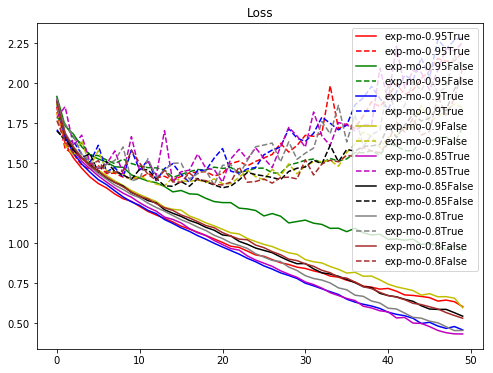

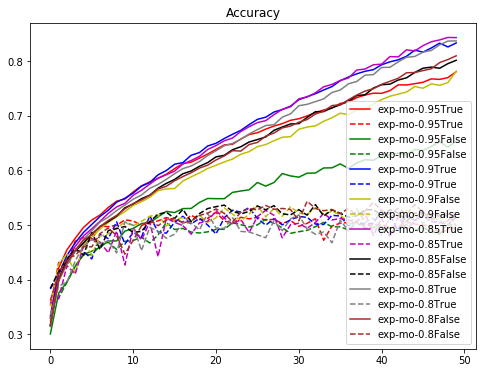

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k", "grey", "brown"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()